<a href="https://colab.research.google.com/github/AzlinRusnan/Machine-Learning/blob/main/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regressions**

**Types of Regressions**

- Linear Regression: Models the relationship between variables by fitting a straight line (y = mx + b).

   - Simple Linear Regression: One independent variable.
   - Multiple Linear Regression: More than one independent variable.

- Logistic Regression: Used when the dependent variable is binary (e.g., yes/no, true/false).

- Polynomial Regression: Models the relationship as a polynomial (y = ax^2 + bx + c), used for more complex relationships.

- Ridge, Lasso, and Elastic Net Regression: Variations of linear regression that handle multicollinearity and feature selection.

### **Linear Regression**

#### **Simple Linear Regression (SLR)**
Technically this means one predictor is linearly related to the response.
	$$ Y = \beta_0 +  \beta_1 X + \epsilon$$

There are two unknown constants that we need to estimate, the intercept $\beta_0$ and the slope, $\beta_1$. Also called coefficients or parameters.

Once they are estimated, the estimated fit becomes
	$$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

There are various ways of estimating the coefficients. The most common approach is via the least squares technique.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
file_path = '/content/gdrive/MyDrive/STQD 6024 Machine Learning/Advertising.csv'
adv = pd.read_csv(file_path)
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


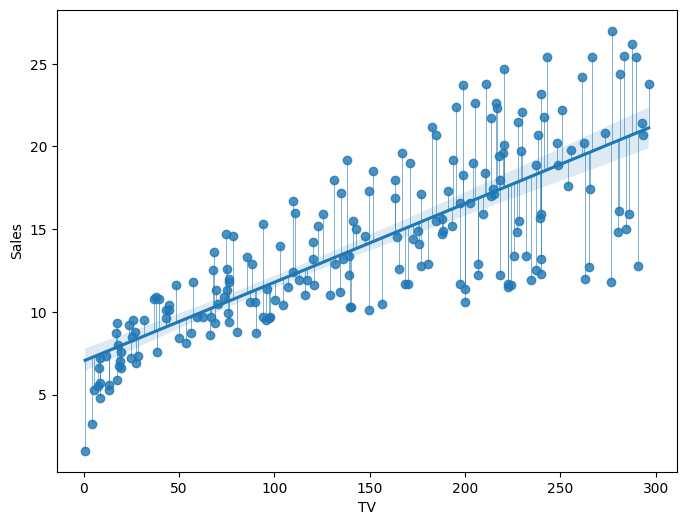

In [5]:
#The np.polyfit function is used in this context to perform a polynomial fit, which, in the case of deg=1, is equivalent to performing a linear fit

fit = np.polyfit(adv['TV'], adv['Sales'], deg=1)
y_hat = fit[1] + adv['TV'] * fit[0]

plt.figure(figsize=(8, 6))
sns.regplot(x='TV', y='Sales', data=adv)
plt.vlines(adv['TV'], y_hat, adv['Sales'], lw = .4);

In [6]:
np.polyfit?

In [7]:
fit

array([0.04753664, 7.03259355])

In [8]:
import statsmodels.formula.api as smf

In [9]:
results1 = smf.ols('Sales ~ TV', data=adv).fit()

In [10]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.47e-42
Time:                        06:17:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the OLS regression results involves understanding the various statistics provided. Here is a detailed breakdown:

**Summary Statistics**

- Dep. Variable: Sales

   - The dependent variable in the regression model is Sales.

- R-squared: 0.612

    - This indicates that 61.2% of the variance in Sales is explained by the TV advertising budget. This is a measure of the goodness-of-fit of the model.

- Adj. R-squared: 0.610

   - The adjusted R-squared adjusts the R-squared value based on the number of predictors in the model. It is slightly lower than the R-squared value, which accounts for the model complexity.

- F-statistic: 312.1

   - This tests whether at least one of the predictors' coefficients is different from zero. A high F-statistic suggests that the model is a good fit for the data.

- Prob (F-statistic): 1.47e-42

   - This is the p-value associated with the F-statistic. A very small p-value (close to zero) indicates that the overall model is statistically significant.

- Log-Likelihood: -519.05

   - This is the log of the likelihood function. It is used in model comparison.

- AIC (Akaike Information Criterion): 1042

   - This is a measure of the relative quality of the model. Lower AIC values indicate a better model.

- BIC (Bayesian Information Criterion): 1049

   - Similar to AIC but includes a penalty for the number of parameters in the model. Lower values indicate a better model.


**Coefficients Table**

- Intercept: 7.0326

   - This is the estimated value of Sales when TV is zero. The intercept is statistically significant (p-value = 0.000).

- TV: 0.0475

   -This is the estimated increase in Sales for each unit increase in the TV advertising budget. The coefficient is statistically significant (p-value = 0.000).


**Interpretation Summary**

- The model explains about 61.2% of the variance in Sales, which suggests a good fit.
- Both the intercept and the TV coefficient are statistically significant, indicating a significant relationship between TV advertising budget and Sales.
- The model has a significant F-statistic, indicating that the model is statistically significant.
- The residuals appear to be normally distributed, and there is no evidence of autocorrelation or significant multicollinearity issues.

In conclusion, the results suggest that there is a significant positive relationship between the TV advertising budget and Sales, and the model provides a good fit to the data.

*The model has a significant F-statistic, indicating that the model is statistically significant.*

To confirm that the model has a significant F-statistic, indicating that the model is statistically significant, you should look at the p-value associated with the F-statistic. Here’s how you can interpret this:

1. **F-statistic and p-value:**

- The F-statistic tests the null hypothesis that all regression coefficients are equal to zero (except the intercept).
- The p-value associated with the F-statistic tells you the probability of observing an F-statistic as extreme as, or more extreme than, the one calculated from your sample data if the null hypothesis is true.

2. **Interpreting the p-value:**

- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, thus you reject the null hypothesis.
- In your output, the Prob (F-statistic) is 1.47e-42, which is an extremely small p-value.

Given your model output:

- F-statistic: 312.1
- Prob (F-statistic): 1.47e-42

Steps to Confirm Statistical Significance:

1. **Check the F-statistic:**

- The value of the F-statistic is 312.1, which is a very high value, suggesting that at least one predictor is significantly related to the dependent variable.

2. **Check the p-value associated with the F-statistic:**

- The p-value 1.47e-42 (which is essentially 0.000...0147 with many zeros before 147) is much smaller than the typical alpha level of 0.05.
- Since the p-value is much less than 0.05, you reject the null hypothesis that all coefficients are equal to zero.